In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Q.1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
election.shape

(1525, 9)

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [6]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
election["gender"].value_counts().to_frame()

,gender
female,812
male,713


In [9]:
election["vote"].value_counts().to_frame()

,vote
Labour,1063
Conservative,462


In [10]:
election["economic.cond.national"].value_counts().to_frame()

,economic.cond.national
3,607
4,542
2,257
5,82
1,37


In [11]:
election["economic.cond.household"].value_counts().to_frame()

,economic.cond.household
3,648
4,440
2,280
5,92
1,65


In [12]:
election["Blair"].value_counts().to_frame()

,Blair
4,836
2,438
5,153
1,97
3,1


In [13]:
election["Hague"].value_counts().to_frame()

,Hague
2,624
4,558
1,233
5,73
3,37


In [14]:
election["Europe"].value_counts().to_frame()

,Europe
11,338
6,209
3,129
4,127
5,124
8,112
9,111
1,109
10,101
7,86


In [15]:
election["political.knowledge"].value_counts().to_frame()

,political.knowledge
2,782
0,455
3,250
1,38


In [16]:
election.skew().to_frame()

,0
age,0.144621
economic.cond.national,-0.240453
economic.cond.household,-0.149552
Blair,-0.535419
Hague,0.152100
Europe,-0.135947
political.knowledge,-0.426838


In [17]:
dups = election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
election[dups].head(9)

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [18]:
election.drop_duplicates(inplace=True) 

In [19]:
dups = election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('shape after removing:',election.shape)

Number of duplicate rows = 0
shape after removing: (1517, 9)


# Q.1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

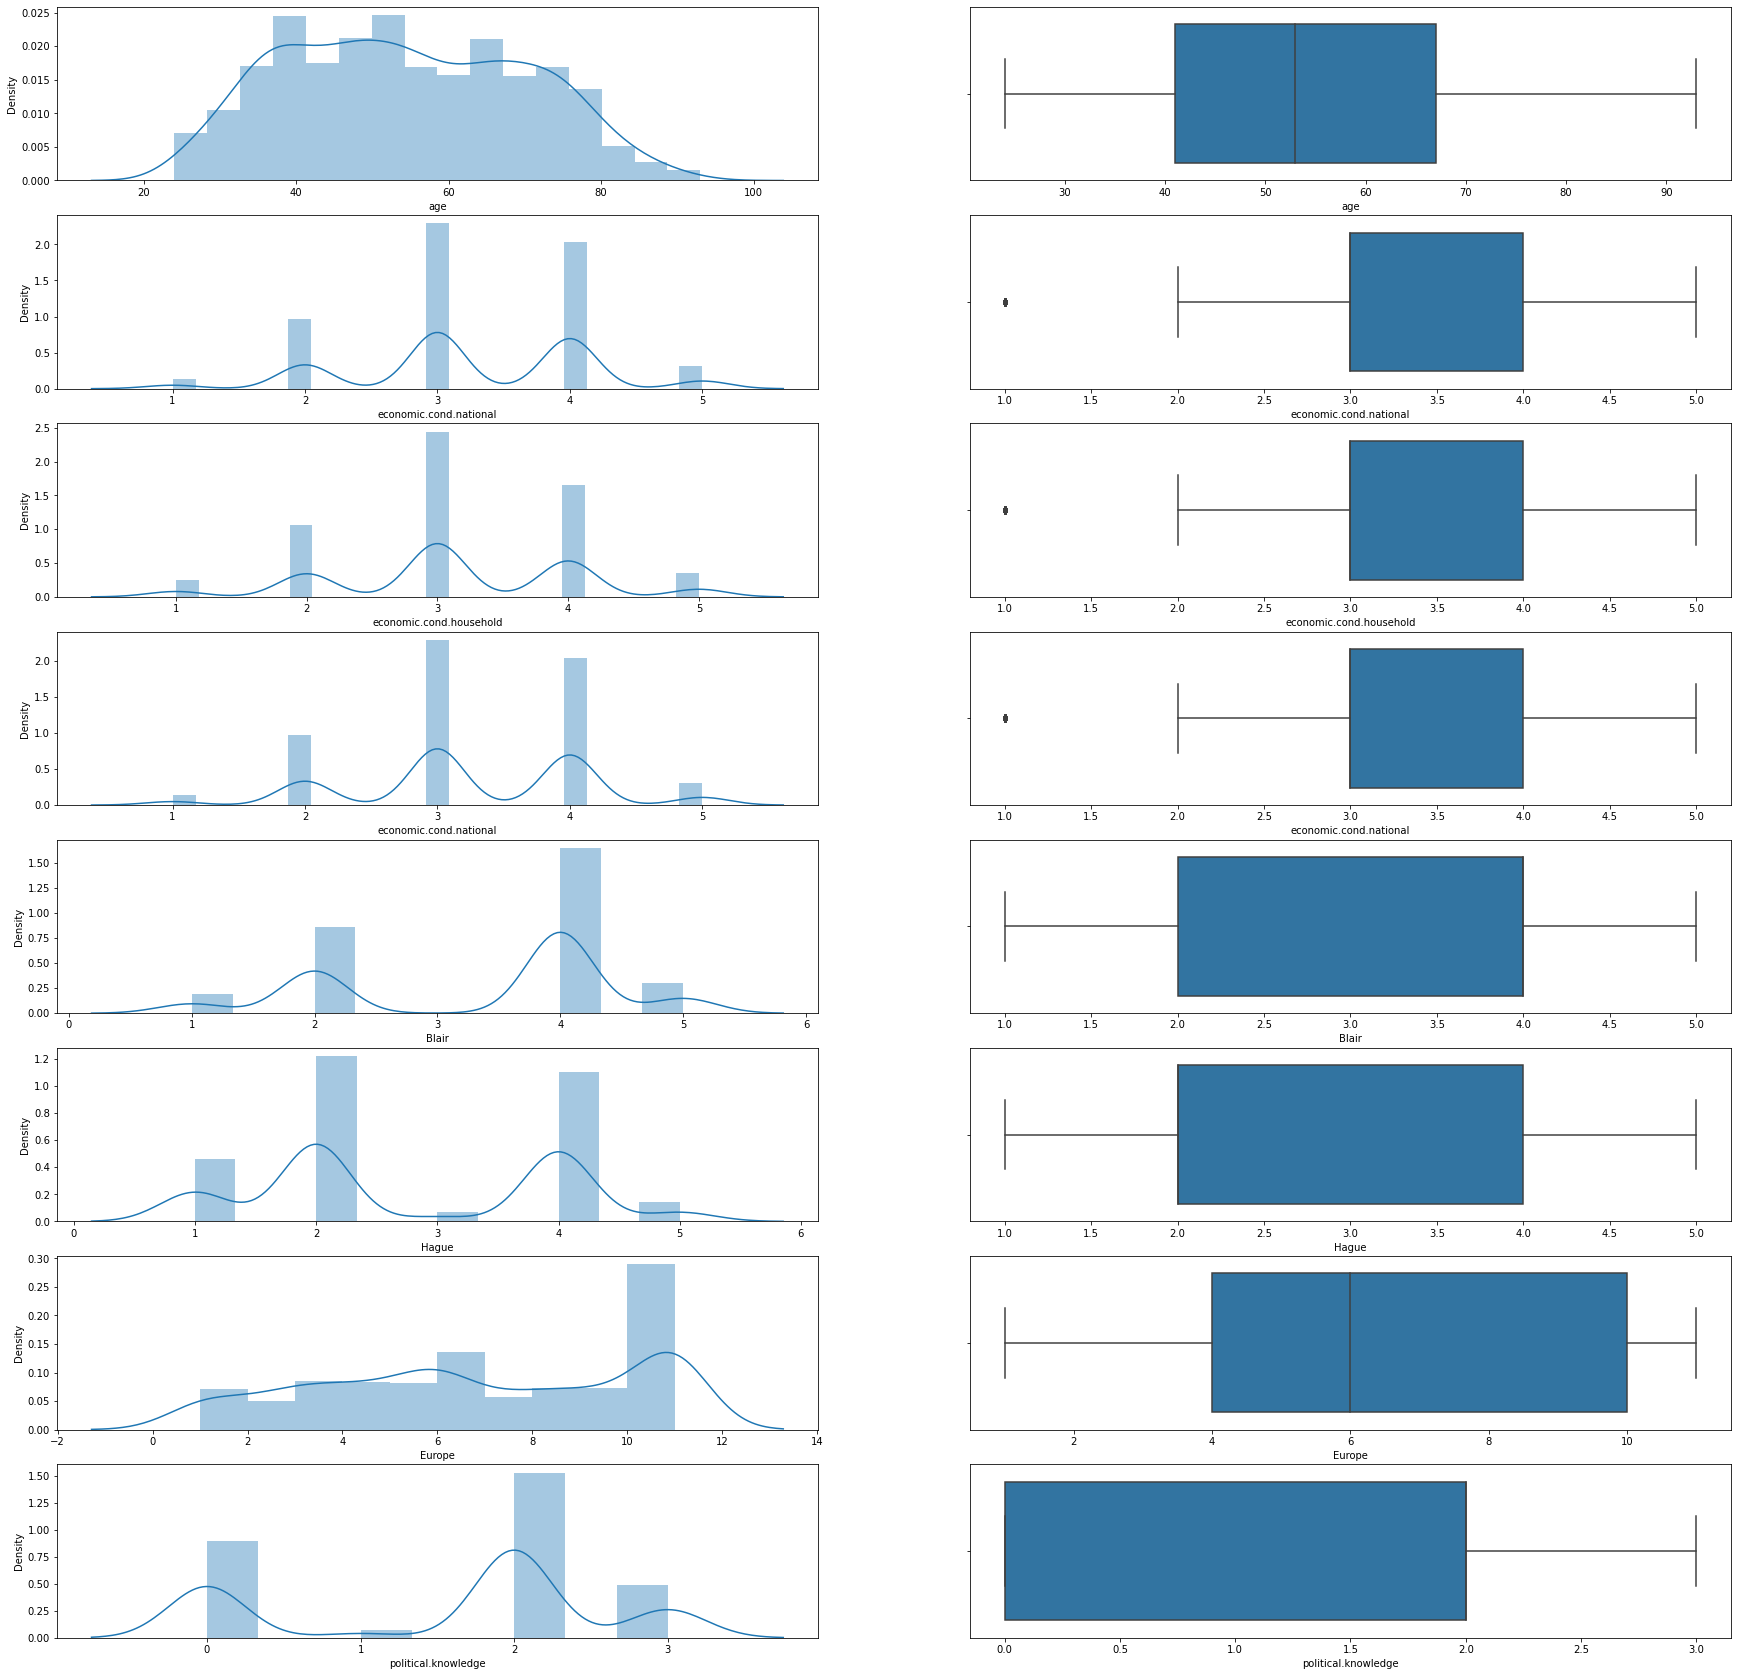

In [20]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(30,30)
sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[3][1])
sns.distplot(election['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election, ax=axes[4][1])
sns.distplot(election['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election , ax=axes[5][1])
sns.distplot(election['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election , ax=axes[6][1])
sns.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election, ax=axes[7][1]);


In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
lr,ur=remove_outlier(election['economic.cond.national'])
election['economic.cond.national']=np.where(election['economic.cond.national']>ur,ur,election['economic.cond.national'])
election['economic.cond.national']=np.where(election['economic.cond.national']<lr,lr,election['economic.cond.national'])
lr,ur=remove_outlier(election['economic.cond.household'])
election['economic.cond.household']=np.where(election['economic.cond.household']>ur,ur,election['economic.cond.household'])
election['economic.cond.household']=np.where(election['economic.cond.household']<lr,lr,election['economic.cond.household'])

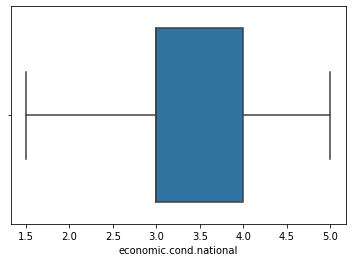

In [23]:
sns.boxplot(x='economic.cond.national', data=election);

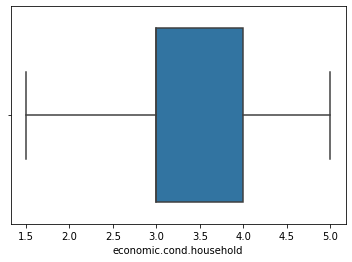

In [24]:
sns.boxplot(x='economic.cond.household', data=election);

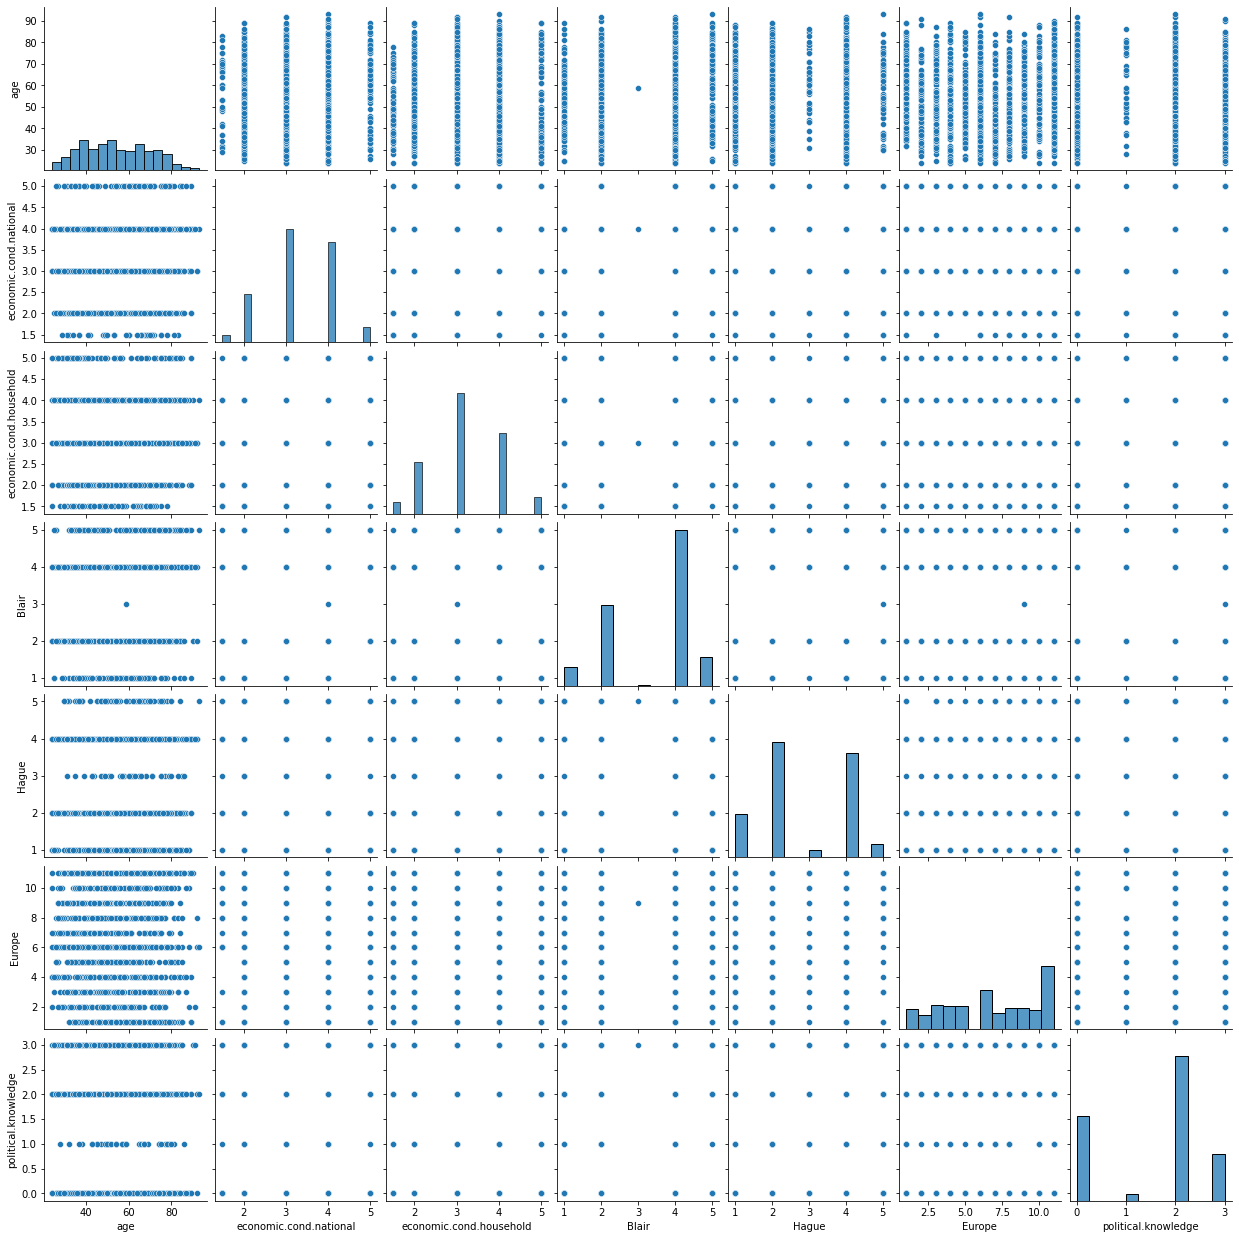

In [25]:
sns.pairplot(election);

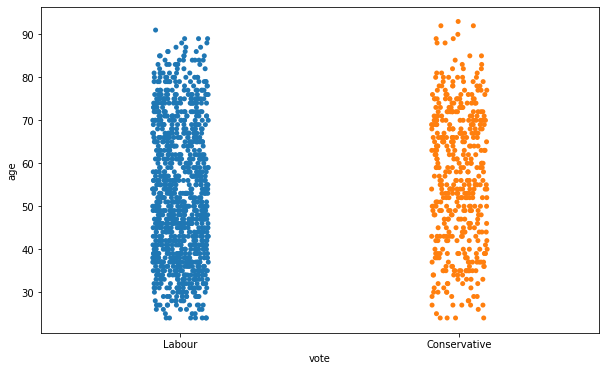

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["age"]);

In [27]:
print(election.value_counts(subset=['vote', 'gender']).sort_values().to_frame())

                       0
vote         gender     
Conservative male    203
             female  257
Labour       male    506
             female  551


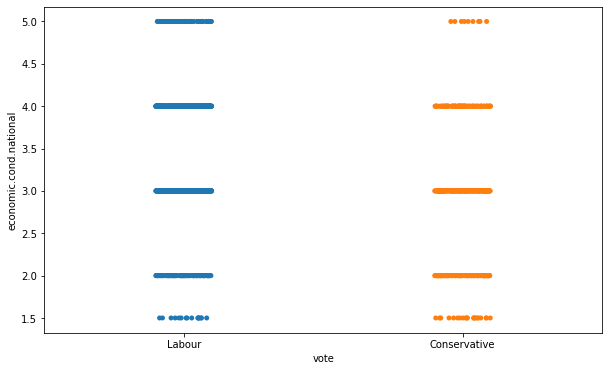

In [28]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["economic.cond.national"]);

In [29]:
print(election.value_counts(subset=['vote', 'economic.cond.national']).sort_values().to_frame())

                                       0
vote         economic.cond.national     
Conservative 5.0                       9
Labour       1.5                      16
Conservative 1.5                      21
Labour       5.0                      73
Conservative 4.0                      91
Labour       2.0                     116
Conservative 2.0                     140
             3.0                     199
Labour       3.0                     405
             4.0                     447


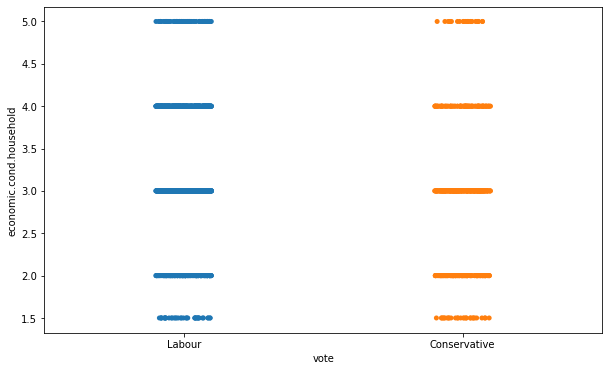

In [30]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["economic.cond.household"]);

In [31]:
print(election.value_counts(subset=['vote', 'economic.cond.household']).sort_values().to_frame())

                                        0
vote         economic.cond.household     
Conservative 5.0                       23
             1.5                       28
Labour       1.5                       37
             5.0                       69
Conservative 4.0                       86
             2.0                      126
Labour       2.0                      154
Conservative 3.0                      197
Labour       4.0                      349
             3.0                      448


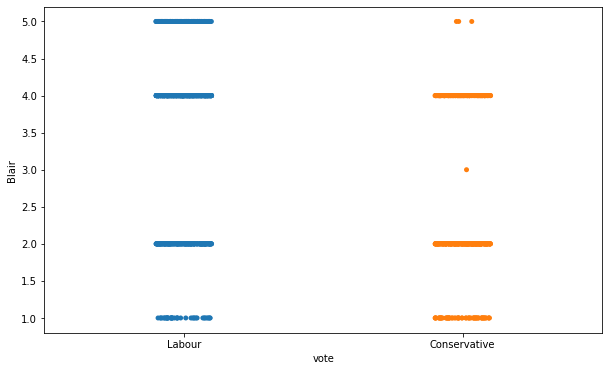

In [32]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["Blair"]);

In [33]:
print(election.value_counts(subset=['vote', 'Blair']).sort_values().to_frame())

                      0
vote         Blair     
Conservative 3        1
             5        3
Labour       1       38
Conservative 1       59
Labour       5      149
Conservative 4      157
Labour       2      194
Conservative 2      240
Labour       4      676


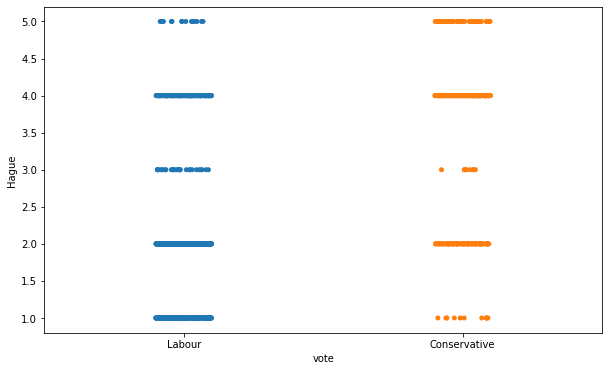

In [34]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["Hague"]);

In [35]:
print(election.value_counts(subset=['vote', 'Hague']).sort_values().to_frame())

                      0
vote         Hague     
Conservative 3        9
             1       11
Labour       5       14
             3       28
Conservative 5       59
             2       95
Labour       1      222
             4      271
Conservative 4      286
Labour       2      522


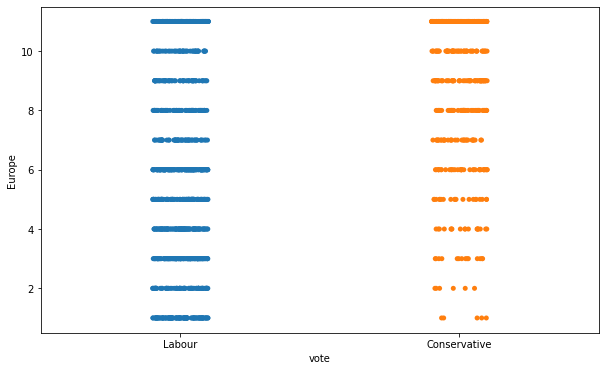

In [36]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["Europe"]);

In [37]:
print(election.value_counts(subset=['vote', 'Europe']).sort_values().to_frame())

                       0
vote         Europe     
Conservative 1         5
             2         6
             3        14
             4        18
             5        20
             7        32
             6        35
Labour       10       47
Conservative 8        48
Labour       7        54
Conservative 10       54
Labour       9        55
Conservative 9        56
Labour       8        63
             2        71
             5       103
             1       104
             4       108
             3       114
             11      166
             6       172
Conservative 11      172


<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

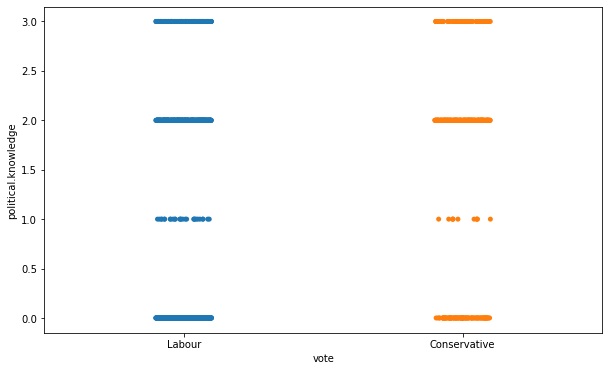

In [38]:
plt.figure(figsize=(10,6))
sns.stripplot(election["vote"],election["political.knowledge"])

In [39]:
print(election.value_counts(subset=['vote', 'political.knowledge']).sort_values().to_frame())

                                    0
vote         political.knowledge     
Conservative 1                     11
Labour       1                     27
Conservative 3                     72
             0                     94
Labour       3                    177
Conservative 2                    283
Labour       0                    360
             2                    493


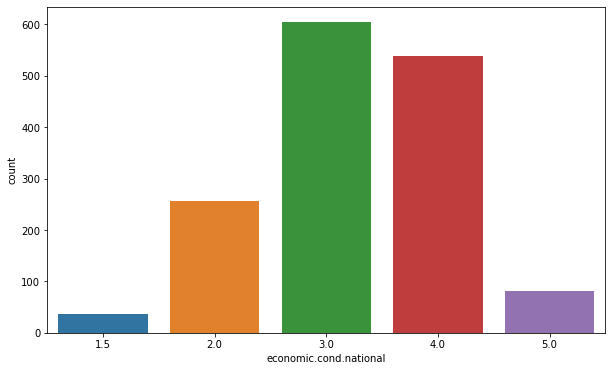

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data =election , x ="economic.cond.national");

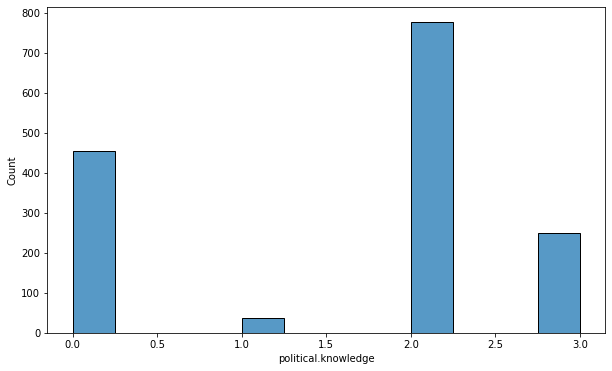

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data =election , x ="political.knowledge");

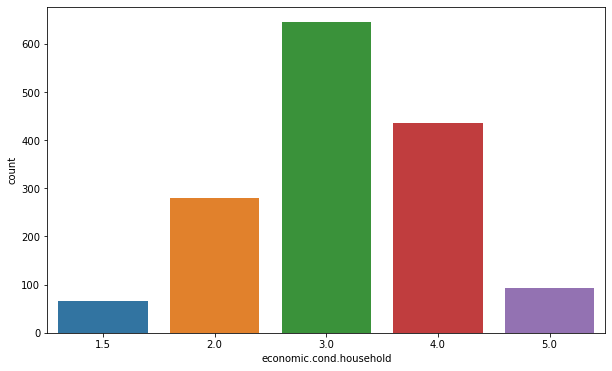

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data =election , x ="economic.cond.household");

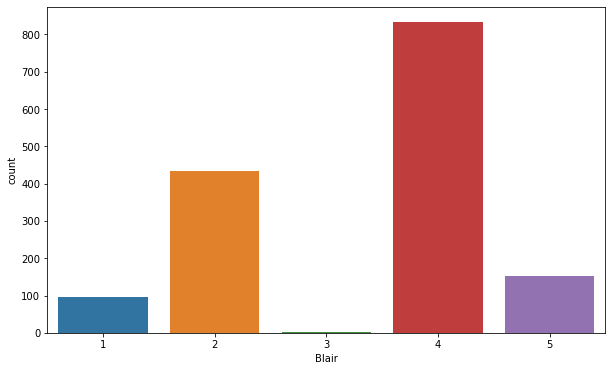

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data =election , x = "Blair");

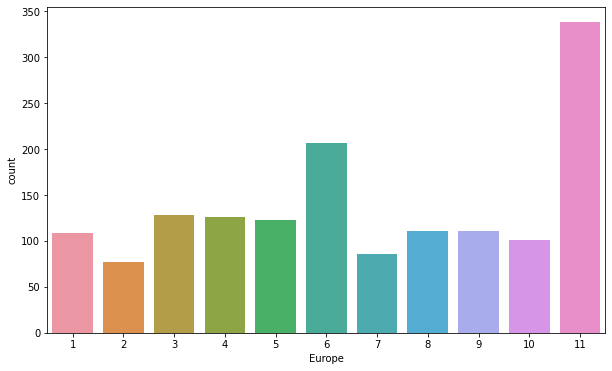

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data =election , x ="Europe");

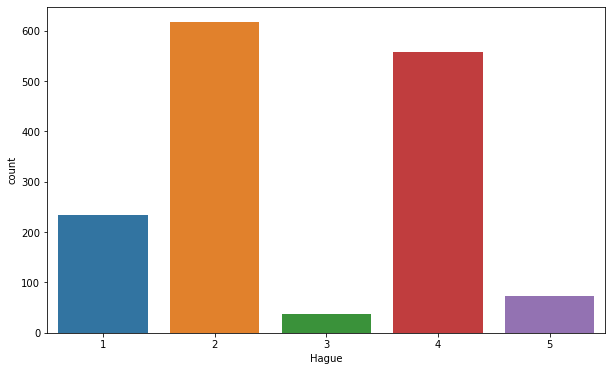

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data =election , x = "Hague");

<AxesSubplot:xlabel='count', ylabel='vote'>

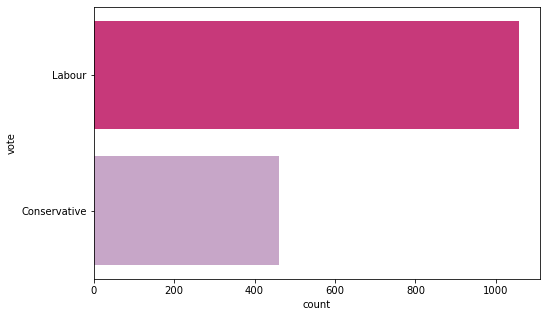

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(y=(election.vote),palette='PuRd_r')

<AxesSubplot:xlabel='count', ylabel='gender'>

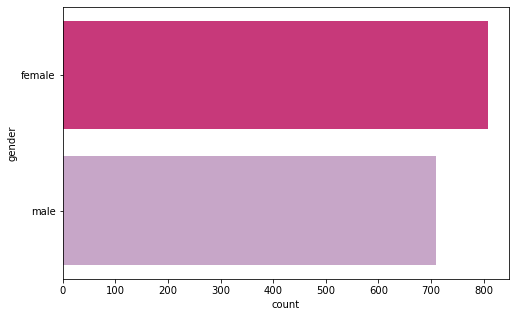

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(y=(election.gender),palette='PuRd_r')

In [48]:
election.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273
economic.cond.household,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521
Blair,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000


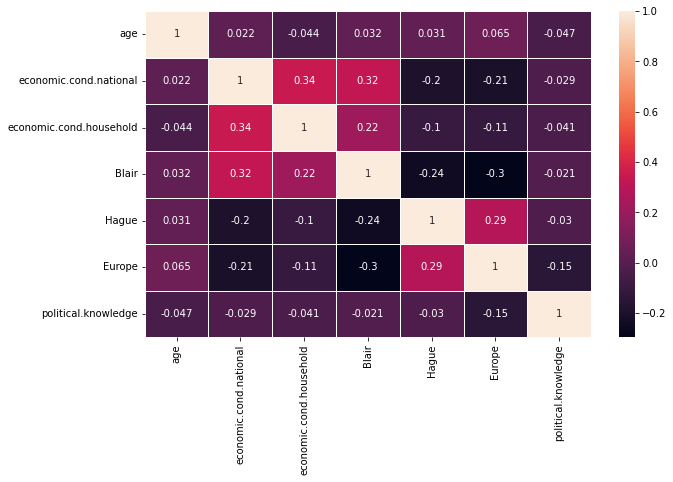

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(election.corr(),annot=True,linewidth = 1);

# Q.1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [50]:
cat=[]
num=[]
for i in election.columns:
    if election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [51]:
election= pd.get_dummies(election,drop_first=True)

In [52]:
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3.0,3.0,4,1,2,2,1,0
2,36,4.0,4.0,4,4,5,2,1,1
3,35,4.0,4.0,5,2,3,2,1,1
4,24,4.0,2.0,2,1,4,0,1,0
5,41,2.0,2.0,1,1,6,2,1,1


In [53]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [54]:
election[num] = X.fit_transform(election[num])
election[num] = election[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [55]:
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,1,0
2,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1,1
3,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1,1
4,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,1,0
5,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1,1


In [56]:
from sklearn.model_selection import train_test_split
x = election.drop("vote_Labour",axis = 1)
y = election.pop("vote_Labour")

In [57]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

1    71.065033
0    28.934967
Name: vote_Labour, dtype: float64


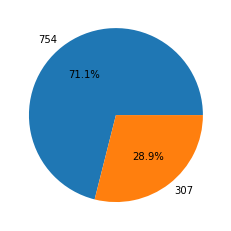

In [58]:
# Checking whether the data is split properly
plt.pie(y_train.value_counts(), labels=y_train.value_counts().values, autopct='%1.1f%%');
print(y_train.value_counts(normalize=True)*100.)

1    66.447368
0    33.552632
Name: vote_Labour, dtype: float64


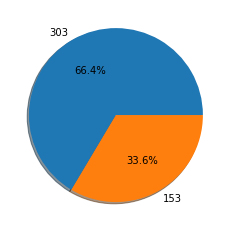

In [59]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().values, autopct='%1.1f%%', shadow=True);
print(y_test.value_counts(normalize=True)*100)

# Q.1.4. Apply Logistic Regression and LDA (Linear Discriminant Analysis) Interpret the inferences of both model s. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr.fit(x_train,y_train)
ytrain_predict = lr.predict(x_train)
ytest_predict = lr.predict(x_test)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


In [61]:
ytest_predict_prob=lr.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


In [62]:
lr.score(x_train, y_train)

0.8341187558906692

In [63]:
#Logistic Regression for Train Data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train ,ytrain_predict))
print(classification_report(y_train ,ytrain_predict))

[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



AxesSubplot(0.125,0.125;0.62x0.755)


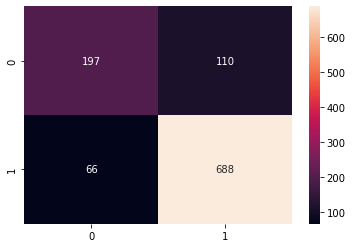

In [64]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True , fmt="2g"));

In [65]:
lr.score(x_test, y_test)

0.8289473684210527

In [66]:
#Logistic Regression for Test Data
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[111  42]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


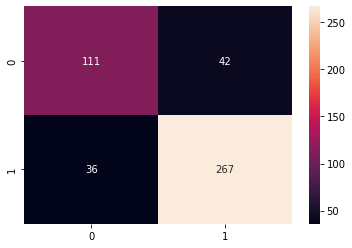

In [67]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True , fmt="2g"))

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


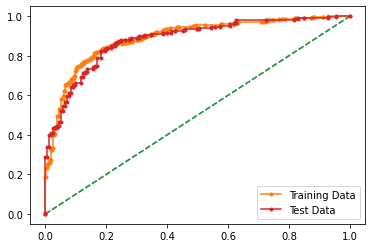

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_test,probs)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [69]:
grid={'penalty':['elasticnet','l2','none','l1'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.000001],
      'verbose':[True, False]
      }

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [71]:
grid_search = GridSearchCV(estimator = lr, param_grid = grid, cv = cv,n_jobs=-1,scoring='f1')

In [72]:
grid_search.fit(x_train, y_train)

[LibLinear]

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['elasticnet', 'l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'verbose': [True, False]},
             scoring='f1')

In [73]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', verbose=True)


In [74]:
best_model = grid_search.best_estimator_

In [75]:
ytrain_predict_best = best_model.predict(x_train)
ytest_predict_best = best_model.predict(x_test)

In [76]:
ytrain_predict_bestprob = best_model.predict_proba(x_train)
ytest_predict_bestprob = best_model.predict_proba(x_test)

In [77]:
pd.DataFrame(ytest_predict_bestprob).head()

,0,1
0,0.425926,0.574074
1,0.172351,0.827649
2,0.008677,0.991323
3,0.815530,0.184470
4,0.078689,0.921311


In [78]:
#Best Model Accuracy- Train
best_model.score(x_train, y_train)

0.8369462770970783

<AxesSubplot:>

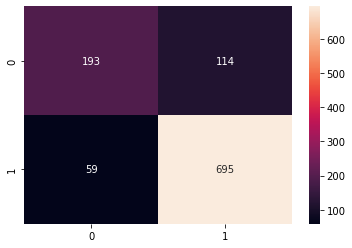

In [79]:
confusion_matrix(y_train,best_model.predict(x_train))
sns.heatmap(confusion_matrix(y_train,best_model.predict(x_train)),annot=True, fmt='d')

In [80]:
print(classification_report(y_train, ytrain_predict_best),'\n');

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



In [81]:
# Best Model Accuracy - Test Data
best_model.score(x_test, y_test)

0.8289473684210527

<AxesSubplot:>

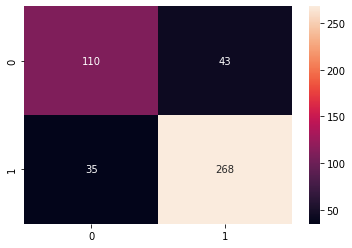

In [82]:
confusion_matrix(y_test,best_model.predict(x_test))
sns.heatmap(confusion_matrix(y_test,best_model.predict(x_test)),annot=True, fmt='d')

In [83]:
print(classification_report(y_test, ytest_predict));

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [84]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytrain_predict, y_train))

0.16588124410933083


In [85]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17105263157894737


AUC for Train Data: 0.891
AUC for Test Data: 0.881


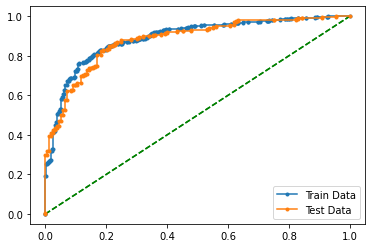

In [86]:
# predict probabilities
probs = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for Train Data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label='Train Data');

# predict probabilities
probs = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC for Test Data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [87]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for age is -0.7889923604816163
The coefficient for economic.cond.national is 2.0766023436061936
The coefficient for economic.cond.household is 0.4081705557696071
The coefficient for Blair is 2.2710315444285327
The coefficient for Hague is -2.9319239071796472
The coefficient for Europe is -1.8809902497022075
The coefficient for political.knowledge is -0.8229867478303144
The coefficient for gender_male is 0.20582433499914016


# LINEAR DISCRIMINANT ANALYSIS

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda = clf.fit(x_train,y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda.predict(x_test)
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[200  69]
 [107 685]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       269
           1       0.91      0.86      0.89       792

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



AxesSubplot(0.125,0.125;0.62x0.755)


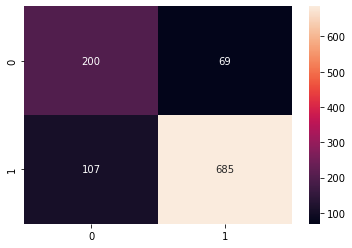

In [89]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(lda.predict(x_train),y_train),annot=True , fmt="2g"));

In [90]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[111  35]
 [ 42 268]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       146
           1       0.88      0.86      0.87       310

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


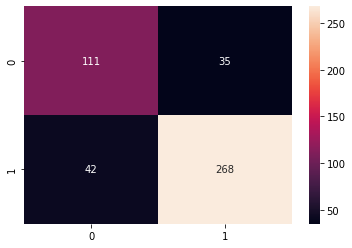

In [91]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(lda.predict(x_test),y_test),annot=True , fmt="2g"));

Training Data AUC: 0.890
Test Data AUC: 0.888


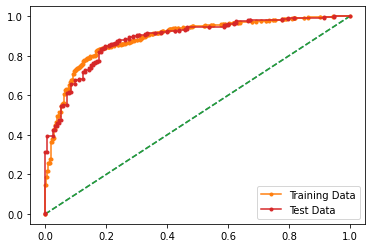

In [92]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Training Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Training Data")

# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Test Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

In [93]:
grid_lda ={'solver' :['svd', 'lsqr', 'eigen']}

In [94]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [95]:
grid_search_lda = GridSearchCV(estimator = lda, param_grid = grid_lda, cv = cv, n_jobs=-1, scoring='f1')

In [96]:
grid_search_lda.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='f1')

In [97]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', verbose=True)


In [98]:
best_model_lda = grid_search_lda.best_estimator_

In [99]:
ytrain_predict_lda = best_model_lda.predict(x_train)
ytest_predict_lda = best_model_lda.predict(x_test)

In [100]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_lda.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.466328,0.533672
1,0.137291,0.862709
2,0.005950,0.994050
3,0.866706,0.133294
4,0.053474,0.946526


In [101]:
best_model_lda.score(x_train, y_train)

0.8350612629594723

<AxesSubplot:>

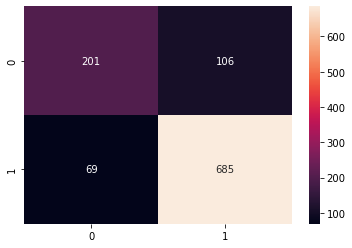

In [102]:
confusion_matrix(y_train,best_model_lda.predict(x_train))
sns.heatmap(confusion_matrix(y_train,best_model_lda.predict(x_train)),annot=True, fmt='d')

In [103]:
print(classification_report(y_train, ytrain_predict_lda));

              precision    recall  f1-score   support

           0       0.74      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [104]:
best_model_lda.score(x_test, y_test)

0.831140350877193

<AxesSubplot:>

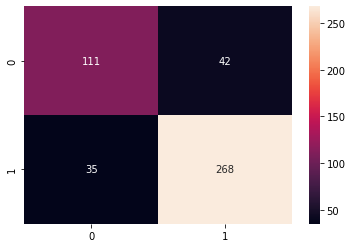

In [105]:
confusion_matrix(y_test,best_model_lda.predict(x_test))
sns.heatmap(confusion_matrix(y_test,best_model_lda.predict(x_test)),annot=True, fmt='d')

In [106]:
print(classification_report(y_test, ytest_predict_lda));

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.890
AUC: 0.888


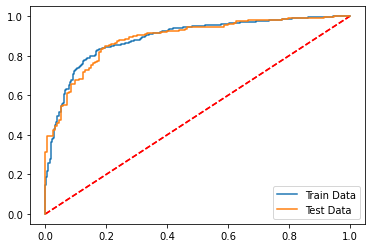

In [107]:
# predict probabilities
probs = best_model_lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label="Train Data");

# predict probabilities
probs = best_model_lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

In [108]:
# Training Data Probability Prediction
pred_prob_train = lda.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = lda.predict_proba(x_test)

0.1 

Recall Score 0.9867
Accuracy Score 0.7615
F1 Score 0.8547
Precision 0.7538
Confusion Matrix


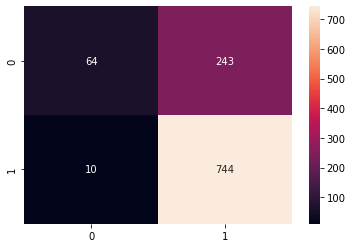

0.2 

Recall Score 0.9682
Accuracy Score 0.7936
F1 Score 0.8696
Precision 0.7892
Confusion Matrix


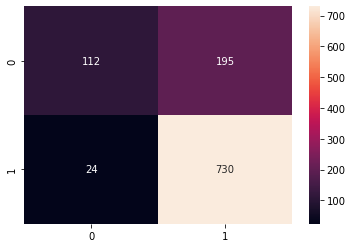

0.3 

Recall Score 0.9523
Accuracy Score 0.8143
F1 Score 0.8794
Precision 0.8168
Confusion Matrix


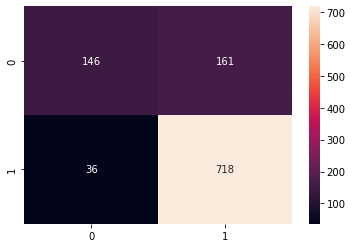

0.4 

Recall Score 0.939
Accuracy Score 0.8351
F1 Score 0.89
Precision 0.8459
Confusion Matrix


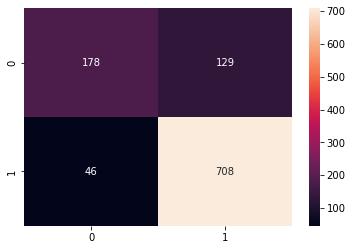

0.5 

Recall Score 0.9085
Accuracy Score 0.8341
F1 Score 0.8862
Precision 0.8649
Confusion Matrix


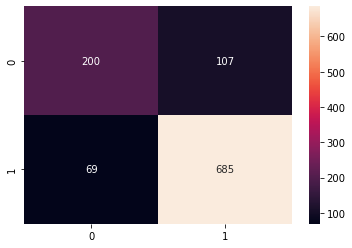

0.6 

Recall Score 0.8753
Accuracy Score 0.8294
F1 Score 0.8794
Precision 0.8835
Confusion Matrix


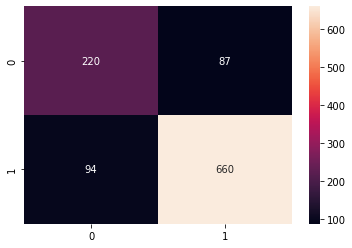

0.7 

Recall Score 0.8355
Accuracy Score 0.8303
F1 Score 0.875
Precision 0.9184
Confusion Matrix


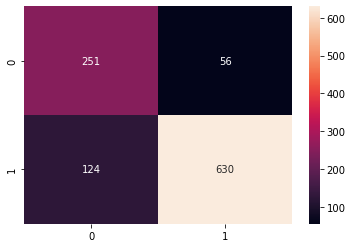

0.8 

Recall Score 0.7493
Accuracy Score 0.7879
F1 Score 0.8339
Precision 0.9401
Confusion Matrix


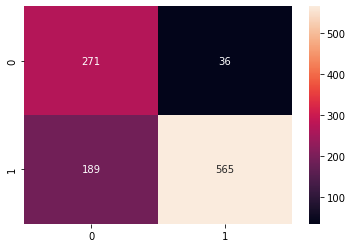

0.9 

Recall Score 0.6008
Accuracy Score 0.6984
F1 Score 0.739
Precision 0.9597
Confusion Matrix


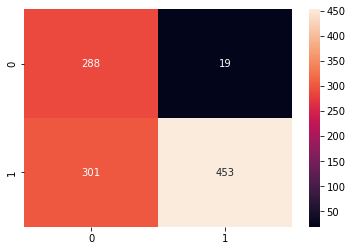

In [111]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4))
    print('Precision',round(metrics.precision_score(y_train,custom_cutoff_data),4))
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [112]:
#Predicting the classes on the train data
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)
    
#Predicting the classes on the test data
data_pred_custom_cutoff_t=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_t.append(a)

<AxesSubplot:>

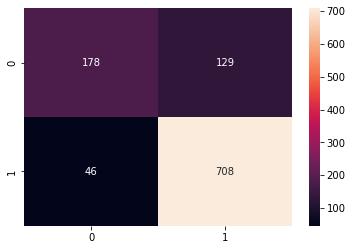

In [113]:
#Model evaluation for Train data.
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff)),annot=True,fmt='.5g')

In [114]:
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff))

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.79      0.58      0.67       307
           1       0.85      0.94      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.84      0.83      1061



<AxesSubplot:>

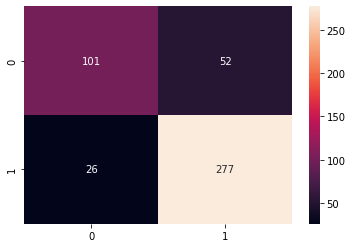

In [115]:
#Model evaluation for Test data
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff_t)),annot=True,fmt='.5g')

In [116]:
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff_t))

Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.80      0.66      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



# Q.1.5. Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# KNN MODEL

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(x_train,y_train)
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.8267543859649122

In [118]:
print(confusion_matrix(knn.predict(x_train),y_train))
print(classification_report(knn.predict(x_train),y_train))

[[221  65]
 [ 86 689]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       286
           1       0.91      0.89      0.90       775

    accuracy                           0.86      1061
   macro avg       0.82      0.83      0.82      1061
weighted avg       0.86      0.86      0.86      1061



AxesSubplot(0.125,0.125;0.62x0.755)


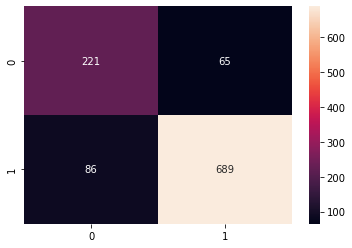

In [119]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(knn.predict(x_train),y_train),annot=True , fmt="2g"));

In [120]:
print(confusion_matrix(knn.predict(x_test),y_test))
print(classification_report(knn.predict(x_test),y_test))

[[108  34]
 [ 45 269]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       142
           1       0.89      0.86      0.87       314

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


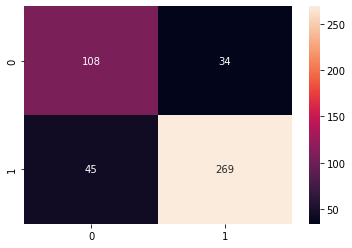

In [121]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(knn.predict(x_test),y_test),annot=True , fmt="2g"));

Training Data AUC: 0.931
Test Data AUC: 0.876


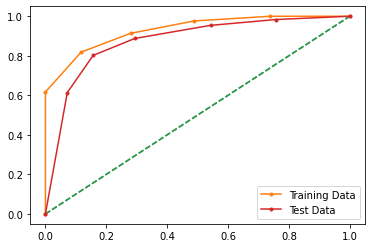

In [122]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Training Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Training Data")
# show the plot

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Test Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

In [123]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.23026315789473684,
 0.19517543859649122,
 0.17324561403508776,
 0.1600877192982456,
 0.16447368421052633,
 0.16447368421052633,
 0.1600877192982456,
 0.16228070175438591,
 0.16666666666666663,
 0.16228070175438591]

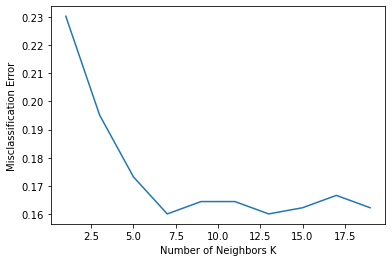

In [124]:
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [125]:
KNN_model_1=KNeighborsClassifier(n_neighbors= 11)
KNN_model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [127]:
## Performance Matrix on train data set
y_train_predict_1 = KNN_model_1.predict(x_train)
model_score = KNN_model_1.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,KNN_model_1.predict(x_train)))
print(metrics.classification_report(y_train, y_train_predict_1))

0.8416588124410933
[[213  94]
 [ 74 680]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



<AxesSubplot:>

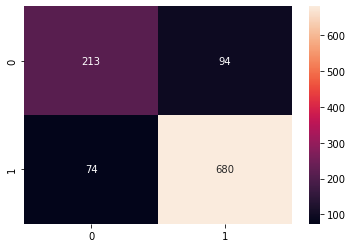

In [128]:
sns.heatmap((metrics.confusion_matrix(y_train,KNN_model_1.predict(x_train))),annot=True,fmt='.5g')

In [129]:
## Performance Matrix on test data set
y_test_predict_1 = KNN_model_1.predict(x_test)
model_score = KNN_model_1.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_1))
print(metrics.classification_report(y_test, y_test_predict_1))

0.8355263157894737
[[108  45]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



<AxesSubplot:>

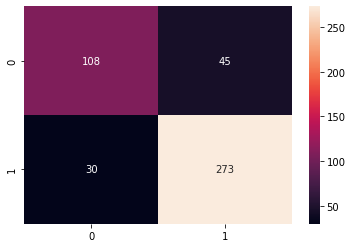

In [130]:
sns.heatmap((metrics.confusion_matrix(y_test,KNN_model_1.predict(x_test))),annot=True,fmt='.5g')

AUC for train data: 0.912
AUC: 0.890


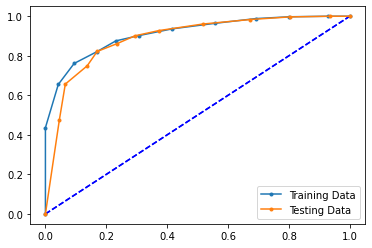

In [131]:
# predict probabilities
probs = KNN_model_1.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC for train data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label="Training Data")

# predict probabilities
probs = KNN_model_1.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker='.',label="Testing Data")
# show the plot
plt.legend(loc='best')
plt.show()

# NAIVE BAIYES

In [132]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb= nb.fit(x_train, y_train)
y_train_predict = nb.predict(x_train)
model_score = nb.score(x_train, y_train)                      
print(model_score)
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

0.8341187558906692
[[212  81]
 [ 95 673]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       293
           1       0.89      0.88      0.88       768

    accuracy                           0.83      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.83      0.84      1061



AxesSubplot(0.125,0.125;0.62x0.755)


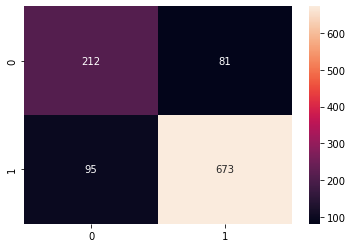

In [133]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(nb.predict(x_train),y_train),annot=True , fmt="2g"));

In [134]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[112  40]
 [ 41 263]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       152
           1       0.87      0.87      0.87       304

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AxesSubplot(0.125,0.125;0.62x0.755)


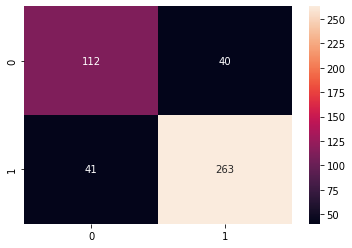

In [135]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(nb.predict(x_test),y_test),annot=True , fmt="2g"));

Train AUC: 0.889
Test AUC: 0.876


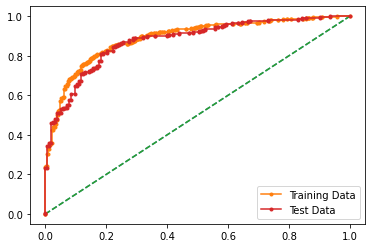

In [136]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Train AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Training Data")

# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

# NAIVE BAYES WITH SMOTE
## SMOTE is only applied on the train data set


In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [138]:
x_train_res.shape

(1508, 8)

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [140]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(x_train_res, y_train_res)

GaussianNB()

In [141]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(x_train_res)
model_score = NB_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8269230769230769
[[623 131]
 [130 624]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       754
           1       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



<AxesSubplot:>

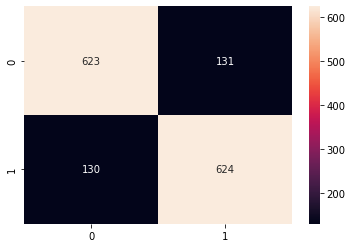

In [142]:
sns.heatmap((metrics.confusion_matrix(y_train_res,NB_SM_model.predict(x_train_res))),annot=True,fmt='.5g')

In [143]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(x_test)
model_score = NB_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8092105263157895
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



<AxesSubplot:>

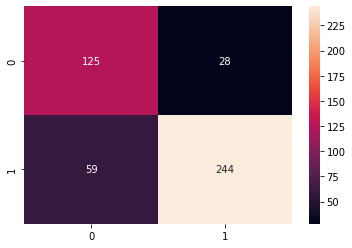

In [144]:
sns.heatmap((metrics.confusion_matrix(y_test,NB_SM_model.predict(x_test))),annot=True,fmt='.5g')

AUC: 0.904
AUC: 0.876


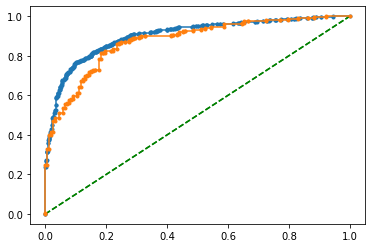

In [145]:
# predict probabilities
probs =NB_SM_model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker=".",label="Train Data");

# predict probabilities
probs = NB_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker=".",label="Test Data");

# Q.1.6. Model Tuning , Bagging and Boosting. Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

# ADAPTIVE BOOSTING

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}
ADB_model=AdaBoostClassifier()
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [147]:
ADB_model=grid_search.best_estimator_
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [148]:
# Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8369462770970783
[[186 121]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AxesSubplot(0.125,0.125;0.62x0.755)


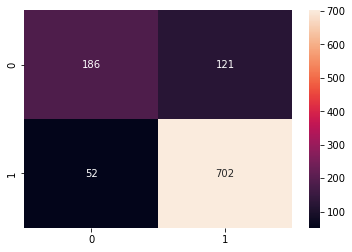

In [149]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"));

In [150]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8092105263157895
[[ 98  55]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



AxesSubplot(0.125,0.125;0.62x0.755)


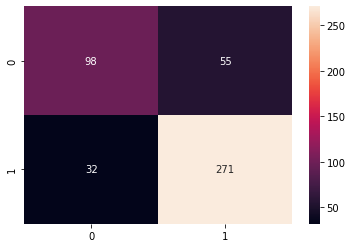

In [151]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"));

Train Data AUC: 0.902
Test Data AUC: 0.884


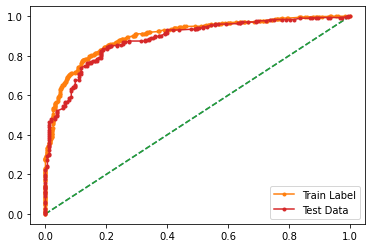

In [152]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Train Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Train Label")

# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Test Data AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

# GRADIENT BOOSTING

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gbclmodel = GradientBoostingClassifier(random_state=1)
gbclmodel.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [154]:
## Performance Matrix on train data set
gbcly_train_predict = gbclmodel.predict(x_train)
gbclmodel_score = gbclmodel.score(x_train, y_train)
print(gbclmodel_score)
print(metrics.confusion_matrix(y_train, gbcly_train_predict))
print(metrics.classification_report(y_train, gbcly_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AxesSubplot(0.125,0.125;0.62x0.755)


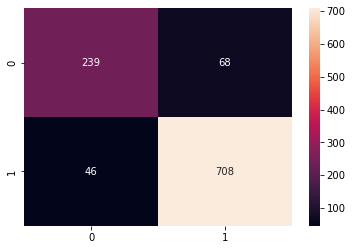

In [155]:
print(sns.heatmap(confusion_matrix(y_train,gbcly_train_predict),annot=True,fmt='.5g'))

In [156]:
## Performance Matrix on test data set
gbcly_test_predict = gbclmodel.predict(x_test)
gbclmodel_score = gbclmodel.score(x_test, y_test)
print(gbclmodel_score)
print(metrics.confusion_matrix(y_test, gbcly_test_predict))
print(metrics.classification_report(y_test, gbcly_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


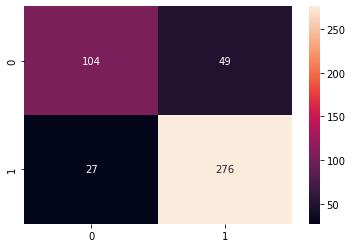

In [157]:
print(sns.heatmap(confusion_matrix(y_test,gbcly_test_predict),annot=True,fmt='.5g'))

AUC: 0.951
AUC: 0.899


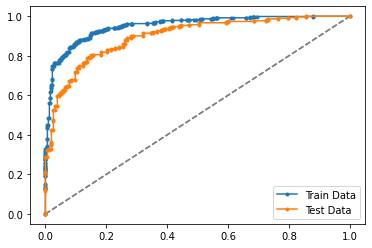

In [158]:
# predict probabilities
probs =gbclmodel.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label="Train Data");

# predict probabilities
probs =gbclmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker='.',label="Test Data")
plt.legend(loc='best')
plt.show()

# DECISION TREE

In [159]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}
DT_model= DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [160]:
DT_model=grid_search.best_estimator_
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [161]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8397737983034873
[[234  73]
 [ 97 657]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       307
           1       0.90      0.87      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AxesSubplot(0.125,0.125;0.62x0.755)


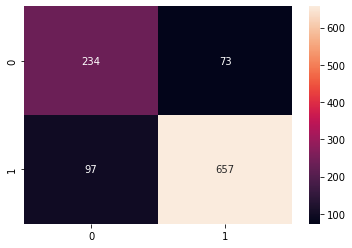

In [162]:
#Heatmap for Train Data
print(sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"));

In [163]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.7960526315789473
[[113  40]
 [ 53 250]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       153
           1       0.86      0.83      0.84       303

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



AxesSubplot(0.125,0.125;0.62x0.755)


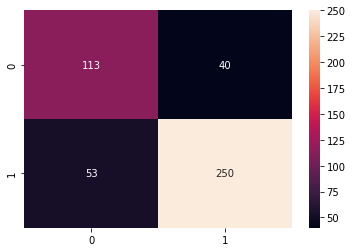

In [164]:
#Heatmap for Test Data
print(sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"));

AUC for Training Data: 0.907
AUC for Testing Data: 0.856


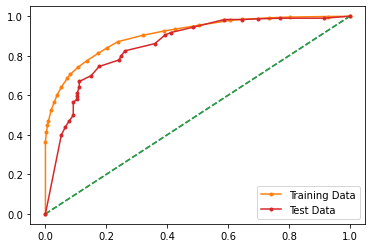

In [165]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC for Training Data: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Training Data")

# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC for Testing Data: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label="Test Data")
# show the plot
plt.legend(loc='best')
plt.show()

# RANDOM FOREST

In [166]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [167]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [168]:
RF_model=grid_search.best_estimator_
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [169]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8576814326107446
[[202 105]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       307
           1       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AxesSubplot(0.125,0.125;0.62x0.755)


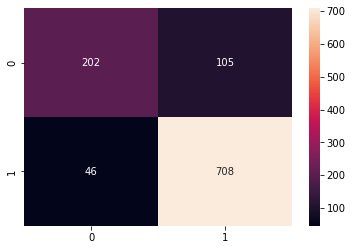

In [170]:
print(sns.heatmap( confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"))

In [171]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8179824561403509
[[ 93  60]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       153
           1       0.82      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



AxesSubplot(0.125,0.125;0.62x0.755)


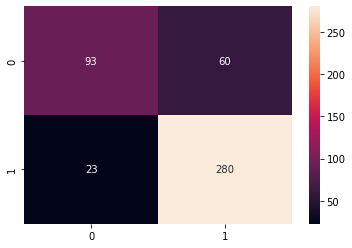

In [172]:
print(sns.heatmap( confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"))

AUC for Training Data: 0.918
AUC:for Test Data 0.891


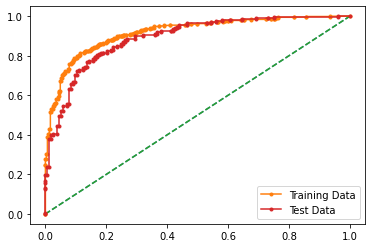

In [173]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC for Training Data: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label= "Training Data")

# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC:for Test Data %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="Test Data")
# show the plot
plt.legend(loc="best")
plt.show()

# BAGGING

In [174]:
from sklearn.ensemble import BaggingClassifier

Bagging_model=BaggingClassifier(base_estimator= RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        min_samples_leaf=15,
                                                        min_samples_split=30,
                                                        random_state=0),
                  n_estimators=100, random_state=1)

In [175]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[185 122]
 [ 43 711]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       307
           1       0.85      0.94      0.90       754

    accuracy                           0.84      1061
   macro avg       0.83      0.77      0.79      1061
weighted avg       0.84      0.84      0.84      1061



<AxesSubplot:>

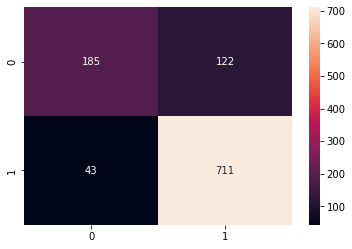

In [176]:
sns.heatmap((metrics.confusion_matrix(y_train,Bagging_model.predict(x_train))),annot=True,fmt='.5g')

In [177]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8179824561403509
[[ 93  60]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       153
           1       0.82      0.92      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



<AxesSubplot:>

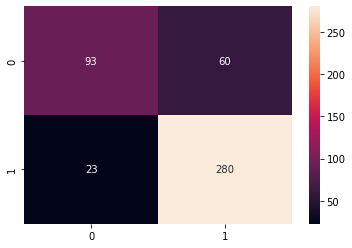

In [178]:
sns.heatmap((metrics.confusion_matrix(y_test,Bagging_model.predict(x_test))),annot=True,fmt='.5g')

AUC: 0.910
AUC: 0.887


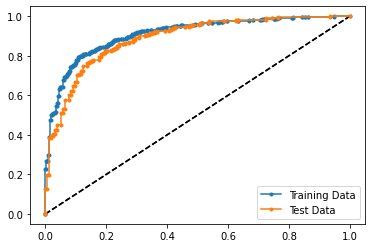

In [179]:
# predict probabilities
probs = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label= "Training Data")

# predict probabilities
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker='.',label= "Test Data");
# show the plot
plt.legend(loc="best")
plt.show()

# PROBLEM 2

In [180]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
import random
import string
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Kewal\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kewal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kewal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [181]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

## ROOSEVELT 1941

In [182]:
Roosevelts_speech=inaugural.raw('1941-Roosevelt.txt')
Roosevelts_speech

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [183]:
inaugural.words(fileids = '1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [186]:
Roosevelt_words=len(inaugural.words('1941-Roosevelt.txt'))
Roosevelt_char=len(inaugural.raw('1941-Roosevelt.txt'))
Roosevelt_sent=len(inaugural.sents('1941-Roosevelt.txt'))

In [188]:
print('Number of Words in Roosevelts speech>>',Roosevelt_words)
print('Number of Characters in Roosevelts speech>>',Roosevelt_char)
print('Number of Sentences in Roosevelts speech>>',Roosevelt_sent)


Number of Words in Roosevelts speech>> 1536
Number of Characters in Roosevelts speech>> 7571
Number of Sentences in Roosevelts speech>> 68


In [234]:
#Before removing stopwords
Roosevelt_number_of_words = list(inaugural.words('1941-Roosevelt.txt'))
print(Roosevelt_number_of_words) 

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'b

In [235]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--', '1789'])

Roosevelt_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_words_clean = [word for word in Roosevelt_words if word not in stopwords]
print("No. of words after removing stop words in Roosevelts speech>>",len(Roosevelt_words_clean))
print(Roosevelt_words_clean)

No. of words after removing stop words in Roosevelts speech>> 630
['national', 'day', 'inauguration', 'since', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slave

In [191]:
Roosevelt_words_clean_freq = nltk.FreqDist(Roosevelt_words_clean)
Roosevelt_words_clean_freq

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [192]:
Roosevelt_word_features = [item[0] for item in Roosevelt_words_clean_freq.most_common(3)]
Roosevelt_word_features

['nation', 'know', 'spirit']

In [193]:
Roosevelt_words2 = ' '.join(Roosevelt_words_clean)
Roosevelt_words2

'national day inauguration since people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things vita

In [229]:
Roosevelt_cleaned_word2 = " ".join([word for word in Roosevelt_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [195]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [199]:
from wordcloud import WordCloud,STOPWORDS
Roosevelt_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(Roosevelt_cleaned_word2)

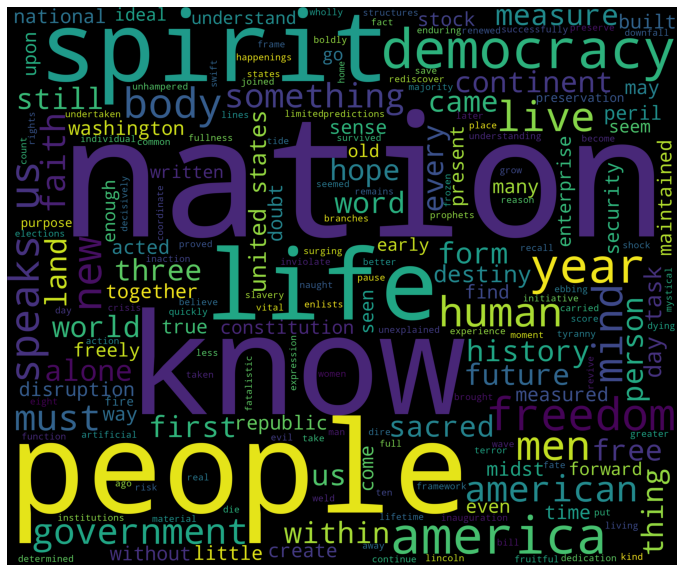

In [200]:
plt.figure(figsize=(12, 12))
plt.imshow(Roosevelt_wordcloud)
plt.axis('off')
plt.show()

## KENNEDY 1961

In [201]:
Kennedy_speech=inaugural.raw('1961-Kennedy.txt')
Kennedy_speech

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [202]:
inaugural.words(fileids = '1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [203]:
Kennedy_word=len(inaugural.words('1961-Kennedy.txt'))
Kennedy_char=len(inaugural.raw('1961-Kennedy.txt'))
Kennedy_sent=len(inaugural.sents('1961-Kennedy.txt'))

In [204]:
print('Number of Words in Kennedys speech>>',Kennedy_word)
print('Number of Characters in Kennedys speech>>',Kennedy_char)
print('Number of Sentences in Kennedys speech>>',Kennedy_sent)

Number of Words in Kennedys speech>> 1546
Number of Characters in Kennedys speech>> 7618
Number of Sentences in Kennedys speech>> 52


In [236]:
#Speech before STOPWORDS
Kennedy_number_of_words = list(inaugural.words('1961-Kennedy.txt'))
print(Kennedy_number_of_words)

['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revoluti

In [237]:
Kennedy_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_words_clean = [word for word in Kennedy_words if word not in stopwords]

print("The number of words after after removing stopwords is>>",len(Kennedy_words_clean))
print(Kennedy_words_clean)

The number of words after after removing stopwords is>> 697
['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'ge

In [206]:
Kennedy_words_clean_freq = nltk.FreqDist(Kennedy_words_clean)
Kennedy_words_clean_freq

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [207]:
Kennedy_word_features = [item[0] for item in Kennedy_words_clean_freq.most_common(3)]
Kennedy_word_features

['let', 'us', 'world']

In [208]:
Kennedy_words2 = ' '.join(Kennedy_words_clean)

In [209]:
Kennedy_cleaned_word2 = " ".join([word for word in Kennedy_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [210]:
Kennedy_cleaned_word2

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

In [211]:
Kennedy_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(Kennedy_cleaned_word2)

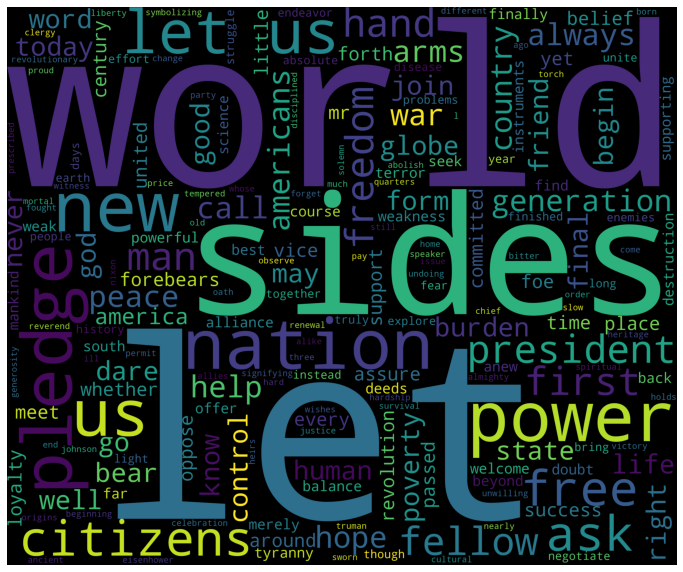

In [212]:
plt.figure(figsize=(12, 12))
plt.imshow(Kennedy_wordcloud)
plt.axis('off')
plt.show()

## NIXON 1973

In [243]:
inaugural.words(fileids = '1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [245]:
Nixon=print(inaugural.raw('1973-Nixon.txt'))
Nixon

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [246]:
Nixon_word=len(inaugural.words('1973-Nixon.txt'))
Nixon_char=len(inaugural.raw('1973-Nixon.txt'))
Nixon_sent=len(inaugural.sents('1973-Nixon.txt'))

In [247]:
print('Number of Words in Nixons speech>>',Nixon_word)
print('Number of Characters in Nixons speech>>',Nixon_char)
print('Number of Sentences in Nixons speech>>',Nixon_sent)

Number of Words in Nixons speech>> 2028
Number of Characters in Nixons speech>> 9991
Number of Sentences in Nixons speech>> 69


In [248]:
#Speech before stopwords
Nixon_number_of_words = list(inaugural.words('1973-Nixon.txt'))
print(Nixon_number_of_words)

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'is

In [249]:
Nixon_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_words_clean = [word for word in Nixon_words if word not in stopwords]

print("The number of words after after removing stopwords is>>",len(Nixon_words_clean))
print(Nixon_words_clean)

The number of words after after removing stopwords is>> 836
['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'fri

In [250]:
Nixon_words_clean_freq = nltk.FreqDist(Nixon_words_clean)
Nixon_words_clean_freq

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [251]:
Nixon_word_features = [item[0] for item in Nixon_words_clean_freq.most_common(3)]
Nixon_word_features

['us', 'let', 'america']

In [252]:
Nixon_words2 = ' '.join(Nixon_words_clean)

In [253]:
Nixon_cleaned_word2 = " ".join([word for word in Nixon_words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [254]:
Nixon_cleaned_word2

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

In [255]:
Nixon_wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(Nixon_cleaned_word2)

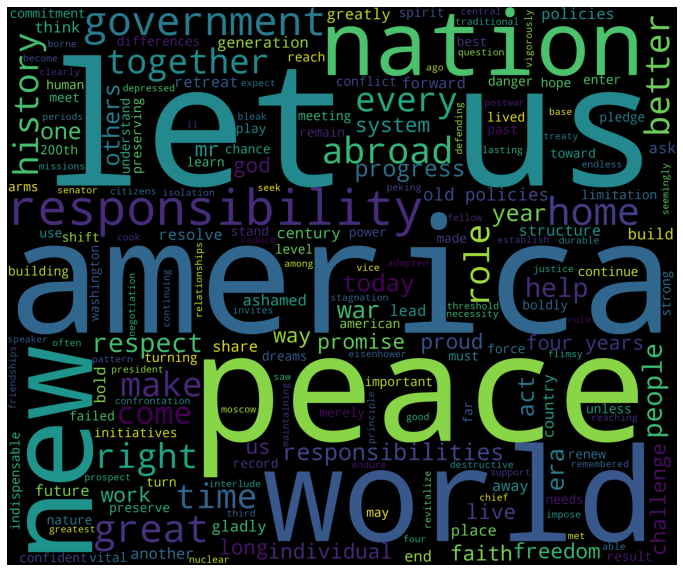

In [256]:
plt.figure(figsize=(12, 12))
plt.imshow(Nixon_wordcloud)
plt.axis('off')
plt.show()